<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%209.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install scikit-fuzzy

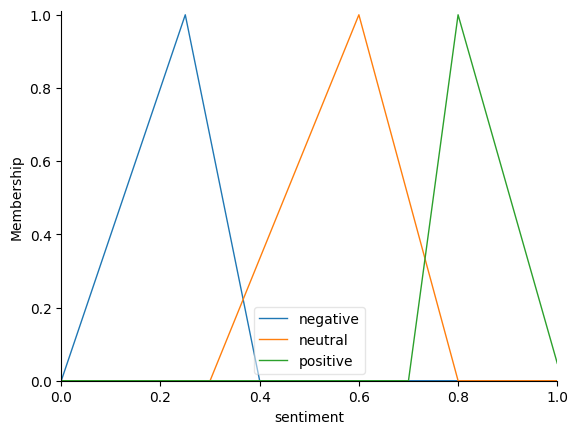

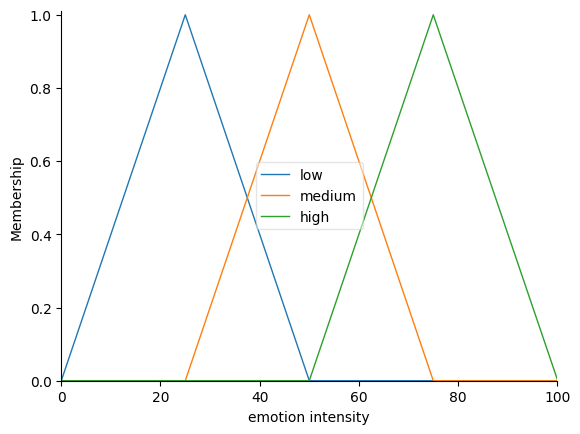

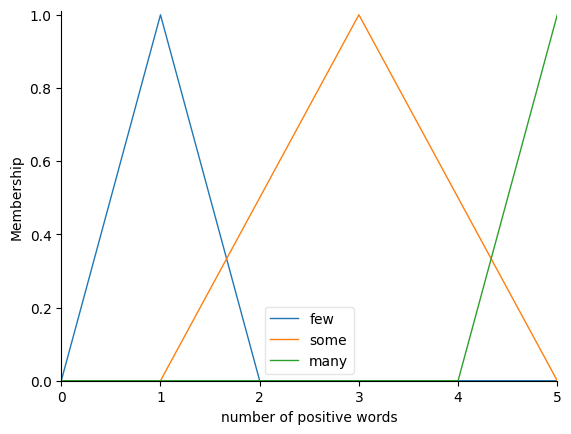

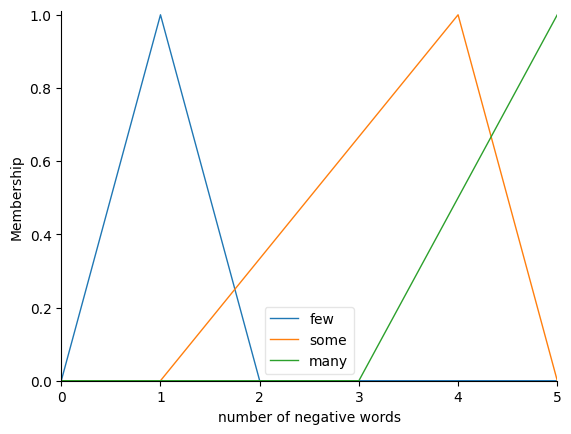

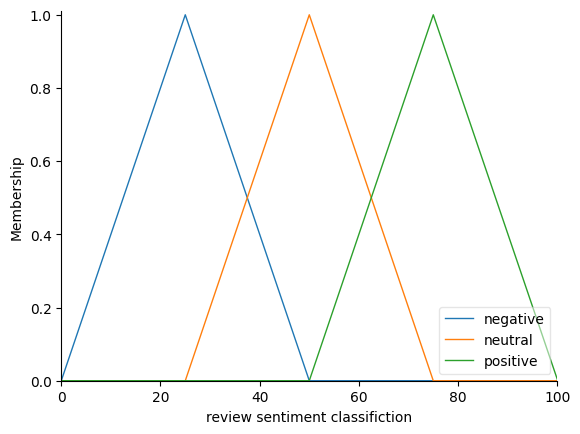

In [28]:
#exam 8

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentiment=ctrl.Antecedent(np.arange(0,1.01,0.01),'sentiment')
emotion_intensity=ctrl.Antecedent(np.arange(0,100.1,0.1),'emotion intensity')
number_positive_words=ctrl.Antecedent(np.arange(0,5.1,0.1),'number of positive words')
number_negative_words=ctrl.Antecedent(np.arange(0,5.1,0.1),'number of negative words')
classification=ctrl.Consequent(np.arange(0,100.1,0.1),'review sentiment classifiction')


sentiment['negative']=fuzz.trimf(sentiment.universe,[0,0.25,0.4])
sentiment['neutral']=fuzz.trimf(sentiment.universe,[0.3,0.6,0.8])
sentiment['positive']=fuzz.trimf(sentiment.universe,[0.7,0.8,1.01])
emotion_intensity['low']=fuzz.trimf(emotion_intensity.universe,[0,25,50])
emotion_intensity['medium']=fuzz.trimf(emotion_intensity.universe,[25,50,75])
emotion_intensity['high']=fuzz.trimf(emotion_intensity.universe,[50,75,100.1])
number_positive_words['few']=fuzz.trimf(number_positive_words.universe,[0,1,2])
number_positive_words['some']=fuzz.trimf(number_positive_words.universe,[1,3,5])
number_positive_words['many']=fuzz.trimf(number_positive_words.universe,[4,5,5.1])
number_negative_words['few']=fuzz.trimf(number_negative_words.universe,[0,1,2])
number_negative_words['some']=fuzz.trimf(number_negative_words.universe,[1,4,5])
number_negative_words['many']=fuzz.trimf(number_negative_words.universe,[3,5,5.1])
classification['negative']=fuzz.trimf(classification.universe,[0,25,50])
classification['neutral']=fuzz.trimf(classification.universe,[25,50,75])
classification['positive']=fuzz.trimf(classification.universe,[50,75,100.1])


sentiment.view()
emotion_intensity.view()
number_positive_words.view()
number_negative_words.view()
classification.view()




dict_keys(['review sentiment classifiction'])
49.99999999999986


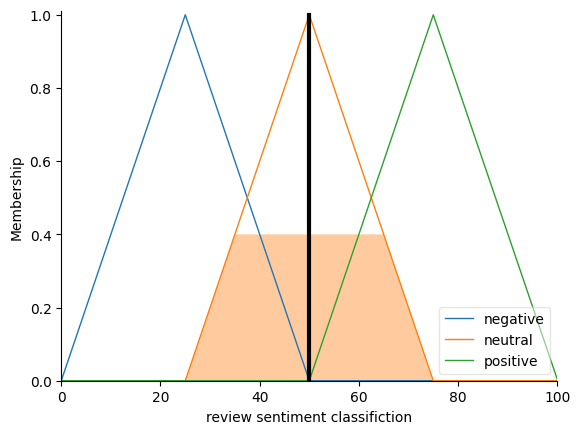

In [29]:
rule1=ctrl.Rule(sentiment['negative']&emotion_intensity['high'],classification['negative'])
rule2=ctrl.Rule(sentiment['negative']&emotion_intensity['low'],classification['neutral'])
rule3=ctrl.Rule(sentiment['neutral']&emotion_intensity['medium'],classification['neutral'])
rule4=ctrl.Rule(sentiment['positive']&emotion_intensity['high'],classification['positive'])
rule5=ctrl.Rule(number_positive_words['many']&number_negative_words['few'],classification['positive'])
rule6=ctrl.Rule(number_positive_words['few']&number_negative_words['many'],classification['negative'])
rule7=ctrl.Rule(number_positive_words['some']&number_negative_words['some'],classification['neutral'])
rule8=ctrl.Rule(sentiment['negative']&number_negative_words['many']&emotion_intensity['high'],classification['negative'])
rule9=ctrl.Rule(sentiment['neutral']&emotion_intensity['medium']&number_positive_words['some'],classification['neutral'])
rule10=ctrl.Rule(sentiment['positive']&number_positive_words['many']&emotion_intensity['high'],classification['positive'])


classification_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
classification_simulation=ctrl.ControlSystemSimulation(classification_ctrl)
classification_simulation.input['sentiment']=0.2
classification_simulation.input['emotion intensity']=50
classification_simulation.input['number of positive words']=4.2
classification_simulation.input['number of negative words']=2.9
classification_simulation.compute()
print(classification_simulation.output.keys())
print(classification_simulation.output['review sentiment classifiction'])
classification.view(sim=classification_simulation)
